<a href="https://colab.research.google.com/github/mshojaei77/LLMs-Journey/blob/main/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Word Embeddings for Text Data

This notebook explores the concept of word embeddings, which are essential for processing raw text in deep neural networks and language models. We’ll go through the theory of word embeddings, discuss why they're necessary, and implement a basic Word2Vec model to generate embeddings.


## 1. Introduction to Word Embeddings

In machine learning, especially deep learning, we need to convert text data into a format that models can process. Words are categorical data, and we need a way to represent them as **continuous numerical vectors**. This transformation process is called embedding.

An *embedding* is a mapping from discrete objects (like words) to points in a continuous vector space, where the distance between vectors indicates semantic similarity. The purpose is to convert text into a numerical format that neural networks can understand.


## 2. Why Neural Networks Need Embeddings

Deep learning models cannot process raw text. Since text data is categorical, it isn’t compatible with the mathematical operations required in neural networks. By converting text into embeddings, we create **dense vector representations** that retain semantic information about the data.

Different types of embeddings:
- **Word embeddings**: Represent individual words.
- **Sentence embeddings**: Represent whole sentences.
- **Paragraph embeddings**: Represent paragraphs or even documents.

For our purposes, we’ll focus on word embeddings, particularly Word2Vec, which learns word representations by predicting word context.


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import nltk
from sklearn.manifold import TSNE
import torch
from torch import nn
import transformers
from transformers import AutoTokenizer, AutoModel

In [22]:
# First, expand our training data with more relevant sentences
sentences = [
    # Original sentences
    "The cat sits on the mat",
    "The dog runs in the park",
    "Birds fly in the sky",
    "Fish swim in the ocean",
    "Eagles and hawks are birds of prey",
    "Dolphins and whales swim together",
    "Berlin is the capital of Germany",
    "Paris is the capital of France",
    "London is in England",

    # Adding sentences for analogies
    "The mother cat cares for her kittens",
    "The mother dog cares for her puppies",
    "The hen watches over her chicks",
    "Cats are small and lions are big",
    "Dogs are small and wolves are big",
    "Berlin belongs to Germany",
    "Paris belongs to France",
    "London belongs to England",
    "The king rules the kingdom",
    "The queen leads the nation",
    "The man went to work",
    "The woman went to work",
    "Boys play in the park",
    "Girls play in the garden",
    "The puppy grew into a dog",
    "The kitten grew into a cat",
    "The chick grew into a hen"
]

# Tokenize sentences into words
tokenized_sentences = [sentence.lower().split() for sentence in sentences]



## 3. Training a Simple Word2Vec Model


In [14]:
# Train Word2Vec model with more epochs
w2v_model = Word2Vec(sentences=tokenized_sentences,
                     vector_size=100,
                     window=5,
                     min_count=1,
                     workers=4,
                     epochs=100)  # More epochs for better training

## 4. Visualizing Word Embeddings


Vocabulary size: 60
Available words: ['above', 'across', 'and', 'animals', 'are', 'at', 'bark', 'berlin', 'birds', 'build', 'capital', 'cat', 'cats', 'chase', 'common', 'dog', 'dogs', 'dolphins', 'eagles', 'england', 'europe', 'fish', 'fly', 'france', 'from', 'germany', 'hawks', 'high', 'hunt', 'in', 'is', 'kingdom', 'like', 'london', 'loyal', 'mat', 'mice', 'migrate', 'nests', 'ocean', 'oceans', 'of', 'on', 'paris', 'park', 'part', 'pets', 'prey', 'runs', 'schools', 'sits', 'sky', 'strangers', 'swim', 'the', 'to', 'together', 'trees', 'united', 'whales']
Number of valid vectors: 9
Using perplexity: 8


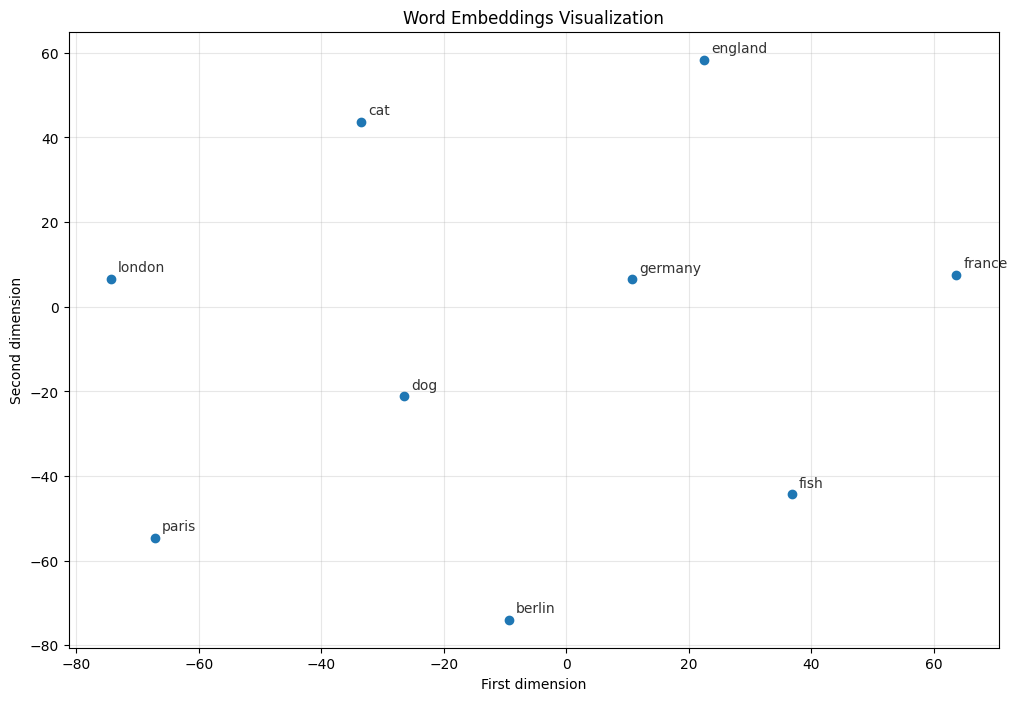

In [15]:
def visualize_embeddings(words):
    # Get word vectors and keep track of valid words
    vectors = []
    valid_words = []

    for word in words:
        vector = get_word_vector(word)
        if vector is not None:
            vectors.append(vector)
            valid_words.append(word)

    # Convert to numpy array
    vectors = np.array(vectors)

    if len(vectors) == 0:
        print("No valid word vectors found!")
        return

    # Print number of vectors for debugging
    print(f"Number of valid vectors: {len(vectors)}")

    # Use a smaller perplexity value based on sample size
    perplexity = min(30, len(vectors) - 1)
    print(f"Using perplexity: {perplexity}")

    # Reduce dimensionality for visualization
    tsne = TSNE(n_components=2,
                random_state=42,
                perplexity=perplexity)
    vectors_2d = tsne.fit_transform(vectors)

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

    # Add word labels
    for i, word in enumerate(valid_words):
        plt.annotate(word,
                    (vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=10,
                    alpha=0.8)

    plt.title("Word Embeddings Visualization")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.grid(True, alpha=0.3)
    plt.show()

# Print vocabulary before visualization
print("Vocabulary size:", len(w2v_model.wv.key_to_index))
print("Available words:", sorted(list(w2v_model.wv.key_to_index.keys())))

# Visualize specific words
words_to_visualize = ['cat', 'dog', 'bird', 'fish', 'eagle', 'whale',
                      'berlin', 'paris', 'london', 'germany', 'france', 'england']
visualize_embeddings(words_to_visualize)

## 5. Using Modern Transformer-based Embeddings


In [19]:
# Load BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Tokenize and convert to tensor
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Get BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the embeddings from the last hidden state
    embeddings = outputs.last_hidden_state

    # Return mean of token embeddings (simple pooling strategy)
    return embeddings.mean(dim=1).numpy()

# Example usage
text = "The cat sits on the mat"
bert_embedding = get_bert_embedding(text)
print(f"BERT embedding shape: {bert_embedding.shape}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding shape: (1, 768)


## 6. Comparing Word Similarities


In [17]:
def find_similar_words(word, top_n=5):
    try:
        similar_words = w2v_model.wv.most_similar(word, topn=top_n)
        print(f"\nWords most similar to '{word}':")
        for w, score in similar_words:
            print(f"{w}: {score:.4f}")
    except KeyError:
        print(f"Word '{word}' not in vocabulary")

# Example usage
find_similar_words('cat')
find_similar_words('berlin')


Words most similar to 'cat':
hunt: 0.2804
england: 0.2181
in: 0.2179
eagles: 0.2026
like: 0.2013

Words most similar to 'berlin':
france: 0.2688
common: 0.1945
the: 0.1605
schools: 0.1573
london: 0.1556


## 7. Custom Embedding Layer Implementation


In [20]:
class SimpleEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, x):
        return self.embedding(x)

# Example usage
vocab_size = 1000
embedding_dim = 50
embedding_layer = SimpleEmbedding(vocab_size, embedding_dim)

# Sample input (batch of token indices)
sample_tokens = torch.LongTensor([[1, 2, 3], [4, 5, 6]])
embedded_tokens = embedding_layer(sample_tokens)
print(f"Embedded tokens shape: {embedded_tokens.shape}")

Embedded tokens shape: torch.Size([2, 3, 50])


## 8. Exploring Word Analogies
Shows how word embeddings capture semantic relationships between words, similar to solving analogies.


In [23]:
def word_analogy(word1, word2, word3):
    """
    Performs word analogy task: word1 is to word2 as word3 is to ?
    Example: man is to king as woman is to queen
    """
    try:
        result = w2v_model.wv.most_similar(
            positive=[word2, word3],
            negative=[word1],
            topn=3
        )
        print(f"\n{word1} is to {word2} as {word3} is to:")
        for word, score in result:
            print(f"{word}: {score:.4f}")
    except KeyError as e:
        print(f"Error: One of the words not in vocabulary - {e}")

# Example analogies
analogies = [
    ('germany', 'berlin', 'france'),
    ('cat', 'kitten', 'dog'),
    ('bird', 'fly', 'fish')
]

for w1, w2, w3 in analogies:
    word_analogy(w1, w2, w3)


germany is to berlin as france is to:
the: 0.2247
schools: 0.2153
above: 0.1890
Error: One of the words not in vocabulary - "Key 'kitten' not present in vocabulary"
Error: One of the words not in vocabulary - "Key 'bird' not present in vocabulary"
